# Problem0

In [1]:
import cv2
import numpy as np
image = cv2.imread("/home/allan1123/hw1_sample_images-1/hw1_sample_images/sample1.png")
print(image.shape)
print(len(image))

(800, 650, 3)
800


In [2]:
def image_flip(arr):
    result = []
    for i in range(0,len(arr)):
        result.insert(0,arr[i])
    return np.array(result)
def show_image(image,image_name):
    print("The shape of the given image is {}.".format(image.shape))
    print("The data type of the given image is {}.".format(image.dtype))
    cv2.imwrite('{}'.format(image_name),image)
    cv2.imshow('image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def change_to_grayscale(arr): #input is constraint to a ndarray or a list
    temp = [[] for i in range(len(arr))]
    for i in range(0,len(arr)):
        for j in range(0,len(arr[i])):
            grayscale = 0.2989*arr[i][j][2] + 0.587*arr[i][j][1] + 0.114*arr[i][j][0]
            temp[i].append(grayscale)
    result = np.array(temp).astype(np.uint8)
    return result

In [3]:
# 1. Flip the image.
result1 = image_flip(image)
show_image(result1,'result1.png')

The shape of the given image is (800, 650, 3).
The data type of the given image is uint8.


In [4]:
# 2. Change the flipped image into grayscale.
result2 = change_to_grayscale(result1)
show_image(result2,'result2.png')

The shape of the given image is (800, 650).
The data type of the given image is uint8.


# Problem1

In [5]:
image2 = cv2.imread("/home/allan1123/hw1_sample_images-1/hw1_sample_images/sample2.png")
# show_image(image2)

In [6]:
def intensity_change(arr,dir,factor):
    temp_list = [[] for i in range(len(arr))]
    if dir == -1:
        for i in range(len(arr)):
            for j in arr[i]:
                temp_list[i].append(j/factor)
    elif dir == 1:
        for i in range(len(arr)):
            for j in arr[i]:
                if (j*factor) >255:
                    temp_list[i].append(255)
                else:    
                    temp_list[i].append(j*factor)
    else :
        return arr
    result = np.array(temp_list,dtype = object).astype(np.uint8)
    print(result)
    return result

In [7]:
result3 = intensity_change(change_to_grayscale(image2),-1,3)
show_image(result3,'result3.png')

[[74 75 74 ... 58 57 56]
 [74 75 74 ... 58 57 57]
 [74 74 74 ... 57 57 56]
 ...
 [ 1  0  2 ...  0  0  0]
 [ 1  0  3 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]]
The shape of the given image is (800, 600).
The data type of the given image is uint8.


In [8]:
result4 = intensity_change(result3,1,3)
show_image(result4,'result4.png')

[[222 225 222 ... 174 171 168]
 [222 225 222 ... 174 171 171]
 [222 222 222 ... 171 171 168]
 ...
 [  3   0   6 ...   0   0   0]
 [  3   0   9 ...   0   0   0]
 [  0   0  15 ...   0   0   0]]
The shape of the given image is (800, 600).
The data type of the given image is uint8.


In [9]:
import matplotlib.pyplot as plt
def generate_image_histogram_value(image): 
    result_count = []
    value_range = []
    for i in range(256):
        result_count.append(np.sum(image == i))
        value_range.append(i)
    return result_count, value_range

def generate_image_histogram(image: np.ndarray, image_name): # TODO: write the result graph into a specific folder
    plt.hist(image.flatten(),range=(0,270),bins=256)
    plt.title('Histogram of {}'.format(image_name))
    plt.xlabel('Pixel Value')
    plt.ylabel('Pixel Number')
    plt.savefig('{}_hist.png'.format(image_name))
    plt.show()

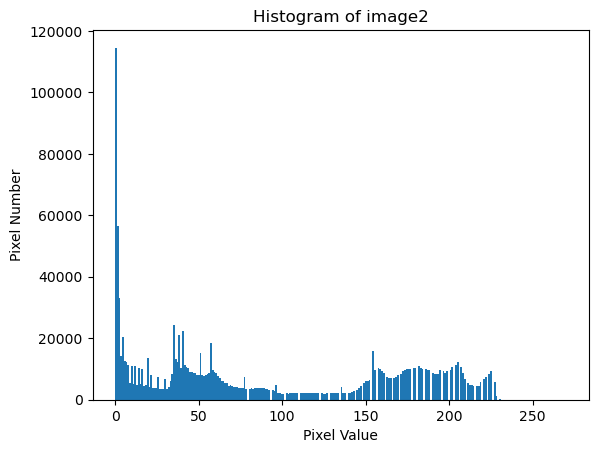

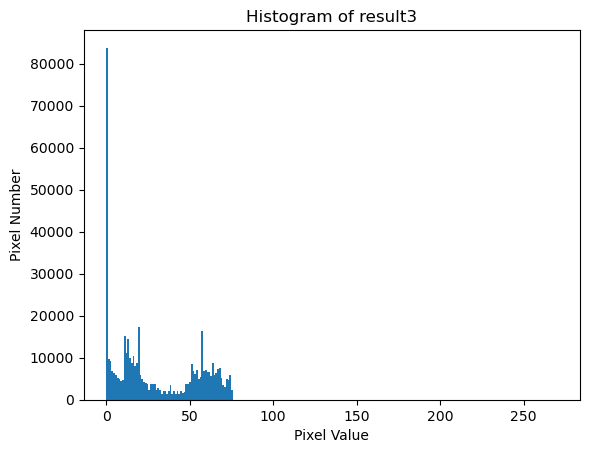

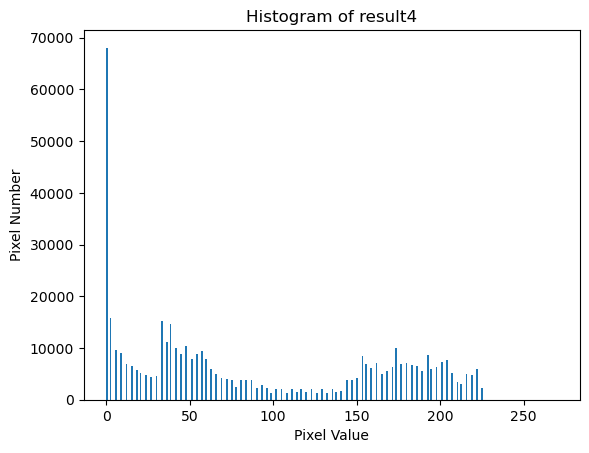

In [10]:
generate_image_histogram(image2,'image2')
generate_image_histogram(result3,'result3')
generate_image_histogram(result4,'result4')

In [11]:
def generate_histogram_equalization_lookup(image):
    pixel_value_count, _pixel_value_range  = generate_image_histogram_value(image)
    shape = image2.shape
    total_pixel = shape[0]*shape[1]
    pdf_list =  [(x/total_pixel)*255 for x in pixel_value_count]
    cdf_list = [0 for i in range(len(pdf_list))]
    for i in range(len(pdf_list)):
        cdf_list[i] = sum(pdf_list[:i+1])
    for i in range(len(cdf_list)):
        cdf_list[i] = round(cdf_list[i])
    print(pixel_value_count)
    # print(pdf_list)
    # print(cdf_list)
    return cdf_list

def histogram_equalization(image): # Assume the image is a grayscale image
    lookup = generate_histogram_equalization_lookup(image)
    for i in range(len(image)):
        for j in range(len(image[i])):
            image[i][j] = lookup[(image[i][j])]
    return image

In [12]:
image2.shape

(800, 600, 3)

[38173, 18845, 11026, 4690, 6814, 4239, 4082, 3731, 1812, 3694, 1748, 3685, 1650, 3441, 1741, 3307, 1509, 1609, 3026, 1455, 1340, 2689, 1283, 1278, 1227, 2475, 1134, 1112, 1153, 2198, 1175, 1421, 2080, 2745, 8131, 4365, 4042, 3598, 3463, 3417, 7416, 3715, 3561, 3433, 3055, 2984, 2946, 2868, 2631, 2649, 5025, 2670, 2611, 2635, 2829, 2901, 3049, 3097, 3213, 3035, 2936, 2600, 2334, 2078, 1989, 1847, 1776, 1542, 1589, 1438, 1424, 1342, 1343, 1304, 1322, 1293, 1217, 1229, 1178, 0, 1186, 1278, 1186, 1267, 1257, 1274, 1284, 1290, 1260, 1192, 1147, 1067, 0, 1061, 970, 812, 785, 759, 686, 672, 620, 0, 710, 629, 684, 695, 693, 743, 697, 0, 680, 704, 716, 733, 742, 0, 694, 711, 719, 699, 741, 699, 0, 700, 665, 645, 692, 0, 679, 695, 705, 685, 681, 0, 693, 717, 684, 683, 0, 777, 765, 837, 933, 0, 1019, 1254, 1466, 0, 1768, 2020, 2024, 2149, 0, 2461, 2842, 3231, 0, 3482, 3363, 3111, 2949, 0, 2480, 2322, 2302, 0, 2394, 2512, 2657, 0, 2830, 3084, 3229, 0, 3316, 3330, 3324, 0, 3429, 3411, 0, 3648, 347

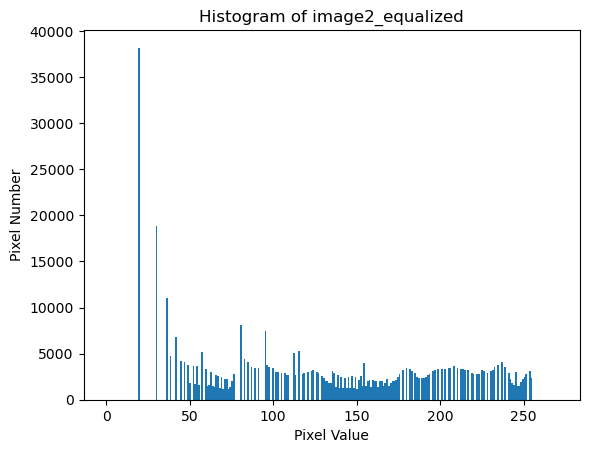

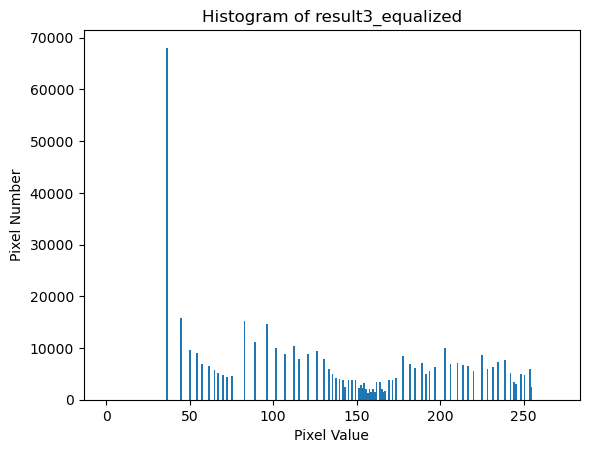

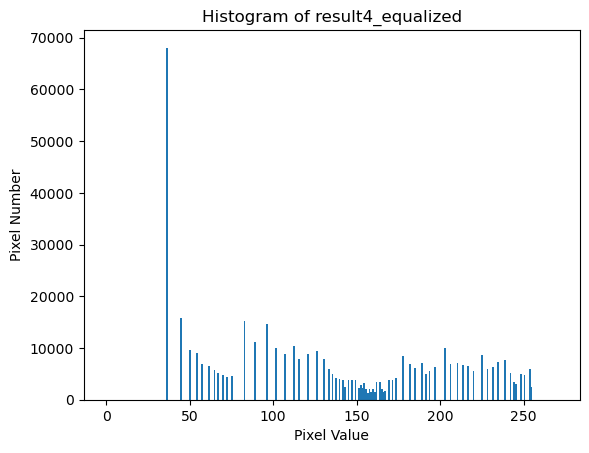

In [13]:
image2_gray = change_to_grayscale(image2)

image2_equalized = histogram_equalization(image2_gray)
result3_equalized = histogram_equalization(result3)
result4_equalized = histogram_equalization(result4)
show_image(image2_equalized,'result5.png')
show_image(result3_equalized,'result6.png')
show_image(result4_equalized,'result7.png')
generate_image_histogram(image2_equalized,'image2_equalized')
generate_image_histogram(result3_equalized,'result3_equalized')
generate_image_histogram(result4_equalized,'result4_equalized')

In [14]:
print(image2_gray)

[[254 255 254 ... 199 197 194]
 [254 255 254 ... 199 196 196]
 [252 254 254 ... 197 196 193]
 ...
 [ 42  30  50 ...  20  20  20]
 [ 39  36  54 ...  20  20  20]
 [ 30  36  60 ...  20  20  20]]


In [15]:
def transfer_for_local(image):
    
    min = image.min()
    max = image.max()
    if min == max:
        return image
    tan = 255 / (max-min) #斜率
    dis = 0 - tan*min #截距
    for i in range(len(image)):
        for j in range(len(image[i])):
            image[i][j] = int(tan * image[i][j] + dis)
    
    return image

The shape of the given image is (800, 600).
The data type of the given image is uint8.


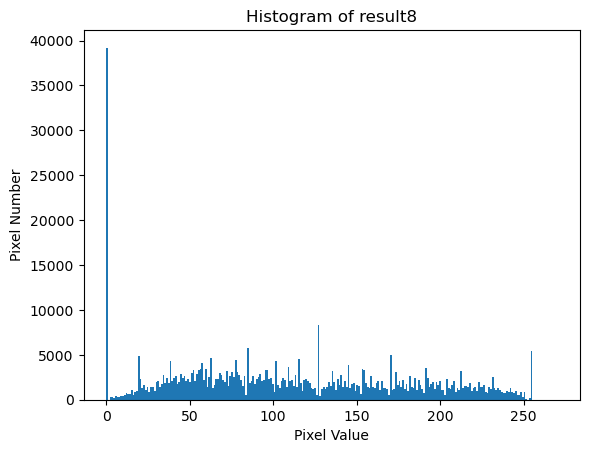

In [16]:
# local histogram equalization
def histogram_equalization_local(image,factor):
    shape = image.shape
    if shape[0] % factor != 0:
        print("Cannot factor input image into smaller part, try using other parameter.")
        return image
    else:
        length = int(shape[0]/factor)
    if shape[1] % factor != 0:
        print("Cannot factor input image into smaller part, try using other parameter.")
        return image
    else:
        width = int(shape[1]/factor)
    le = 0

    for i in range(factor):
        wi = 0
        for j in range(factor):
            sampled = image[le:le+length,wi:wi+width]
            equalized = transfer_for_local(sampled)
            image[le:le+length,wi:wi+width] = equalized
            wi += width
        le += length
    return image

result8 = histogram_equalization_local(image2_gray,40)
show_image(result8,'result8.png')
generate_image_histogram(result8,'result8')

In [17]:
# 6. cat
def transfer(image, breakpoint):
    darkside_tan = (breakpoint[1])/(breakpoint[0])
    brightside_tan = (255-breakpoint[1]) / (255-breakpoint[0])
    brightside_dis = breakpoint[1] - brightside_tan*breakpoint[0]
    for i in range(len(image)):
        for j in range(len(image[i])):
            if image[i][j] < breakpoint[0]:
                image[i][j] = int(image[i][j] * darkside_tan)
            else: 
                image[i][j] = int(image[i][j] * brightside_tan + brightside_dis)
    return image

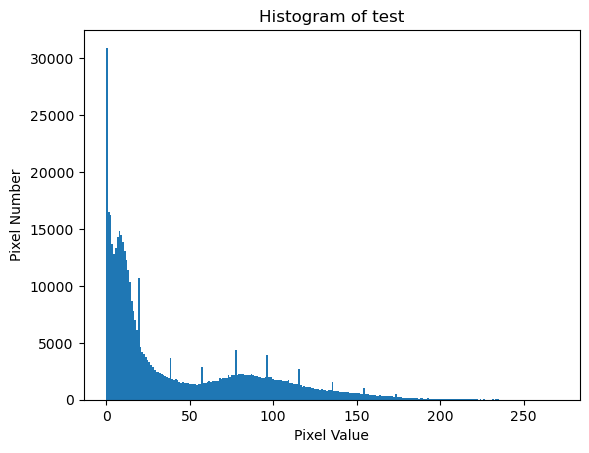

The shape of the given image is (600, 800).
The data type of the given image is uint8.


In [18]:
image3 = cv2.imread("/home/allan1123/hw1_sample_images-1/hw1_sample_images/sample3.png")
image3_gray = change_to_grayscale(image3)
generate_image_histogram(image3_gray,'test')
result9 = transfer(image3_gray,(100,200))
show_image(result9,'result9.png')

# Problem2

In [56]:
import math
from scipy import signal
def calculate_psnr(image1, image2):
    mse = np.mean((image1/1.0 - image2/1.0)**2)
    if mse < 1e-10:
        return 100
    psnr = 20 * math.log10(255/ math.sqrt(mse))
    return psnr

def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)
def gaussian_filter(image,ker_s,sigma):
    kernel = gaussian_kernel(ker_s,sigma)
    result = signal.convolve2d(image,kernel,mode='same',boundary='symm')
    return result

def median_filter(image,mask_s):
    temp = image

    for i in range(len(image)):
        for j in range(len(image[i])):
            mask = temp[i:i+mask_s,j:j+mask_s]
            image[i][j] = int(np.median(mask))
    return image

# def pseudomedian_filter(image,cross_s):
#     temp = image
#     for i in range(cross_s//2):
#         np.insert(temp,0,image[0])
#         np.insert(temp,-1,image[-1])
#     for i in range(len(image)):
#         for j in range(len(image[i])):
            


In [57]:
image4 = cv2.imread("/home/allan1123/hw1_sample_images-1/hw1_sample_images/sample4.png")
image4_gray = change_to_grayscale(image4)

In [58]:
image5 = cv2.imread("/home/allan1123/hw1_sample_images-1/hw1_sample_images/sample5.png")
image5_gray = change_to_grayscale(image5)

In [64]:
result10 = gaussian_filter(image5_gray,3,2)
show_image(result10,'result10.png')

The shape of the given image is (550, 500).
The data type of the given image is float64.


In [62]:
image6 = cv2.imread("/home/allan1123/hw1_sample_images-1/hw1_sample_images/sample6.png")
image6_gray = change_to_grayscale(image6)

In [63]:
result11 = median_filter(image6_gray,4)
show_image(result11,'result11.png')

The shape of the given image is (550, 500).
The data type of the given image is uint8.


In [65]:
print('the PSNR of result10 and sample5 is {}'.format(calculate_psnr(result10,image5_gray)))
print('the PSNR of result11 and sample6 is {}'.format(calculate_psnr(result11,image6_gray)))

the PSNR of result10 and sample5 is 21.06400813547365
the PSNR of result11 and sample6 is 100
